<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/6thWeekTasks/K%20Means%20Clustering_Mall%20Customers_Muhammad%20Raihan%20B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Tugas Lecture 6 K Means Clustering On Mall_Customers.csv dataset

Dataset : Mall_Customers.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/4ce4692e-d27e-4053-879d-3601e8c408f4

# MOUNT GOOGLE DRIVE

Prompt : berikan saya kode untuk membaca dataset dari google drive saya ke colab


In [65]:
from google.colab import drive

# Menghubungkan dengan Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [66]:
import pandas as pd

# Ubah path sesuai dengan path di Google Drive Anda
path = "/content/drive/My Drive/Dataset/Mall_Customers.csv"

# Baca dataset
df = pd.read_csv(path)

# Tampilkan beberapa baris pertama dataset
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# PREPROCESSING

Prompt: berikan saya kode untuk menghapus kolom CustomerID dari dataset Mall_Customers

In [67]:
# Menghapus kolom 'CustomerID'
df.drop('CustomerID', axis=1, inplace=True)

# Tampilkan dataframe setelah menghapus kolom
print("\nDataFrame setelah menghapus kolom CustomerID:")
print(df.head())


DataFrame setelah menghapus kolom CustomerID:
    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


Prompt: berikan saya kode untuk mengganti nama kolom Genre menjadi Gender

In [68]:
# Mengganti nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Tampilkan dataframe setelah perubahan nama kolom
print("\nDataFrame setelah mengganti nama kolom:")
print(df.head())


DataFrame setelah mengganti nama kolom:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


Prompt: berikan saya kode untuk melakukan konversi Gender Male dan Female menjadi numerik

In [69]:
# Konversi 'Gender' menjadi numerik
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Tampilkan dataframe setelah konversi
print("\nDataFrame setelah konversi:")
print(df.head())


DataFrame setelah konversi:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


Prompt: berikan saya kode untuk memilih jumlah cluster terbaik menggunakan elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

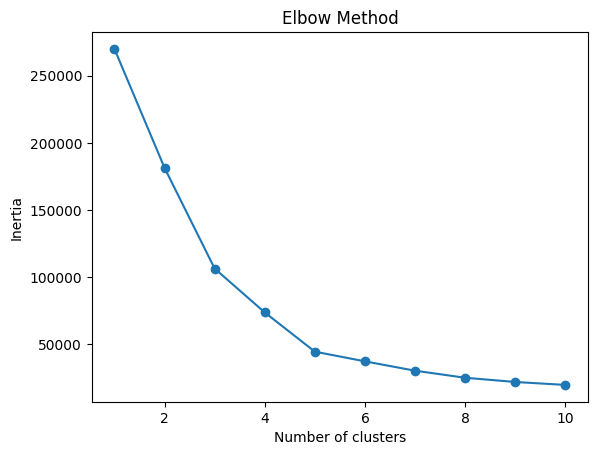

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memilih fitur yang akan digunakan untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Menyimpan nilai inertia (within-cluster sum of squares) untuk setiap jumlah cluster
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# MODELING

Prompt: berikan saya kode untuk melakukan standarisasi

In [71]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada fitur-fitur yang dipilih
X_scaled = scaler.fit_transform(X)

# Membuat dataframe dari fitur-fitur yang telah di-standarisasi
df = pd.DataFrame(X_scaled, columns=X.columns)

# Menampilkan beberapa baris pertama dari dataframe yang telah di-standarisasi
print(df.head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


Prompt: berikan saya kode untuk membuat cluster sebanyak 5 cluster

In [72]:
# Membuat objek KMeans dengan 5 cluster
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Melakukan clustering
kmeans.fit(X)

# Menambahkan label cluster ke dataframe
df['Cluster'] = kmeans.labels_

# Menampilkan beberapa baris pertama dari dataframe dengan label cluster
print(df.head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0           -1.738999               -0.434801        2
1           -1.738999                1.195704        3
2           -1.700830               -1.715913        2
3           -1.700830                1.040418        3
4           -1.662660               -0.395980        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prompt: berikan saya kode untuk melakukan visualisasi hasil cluster

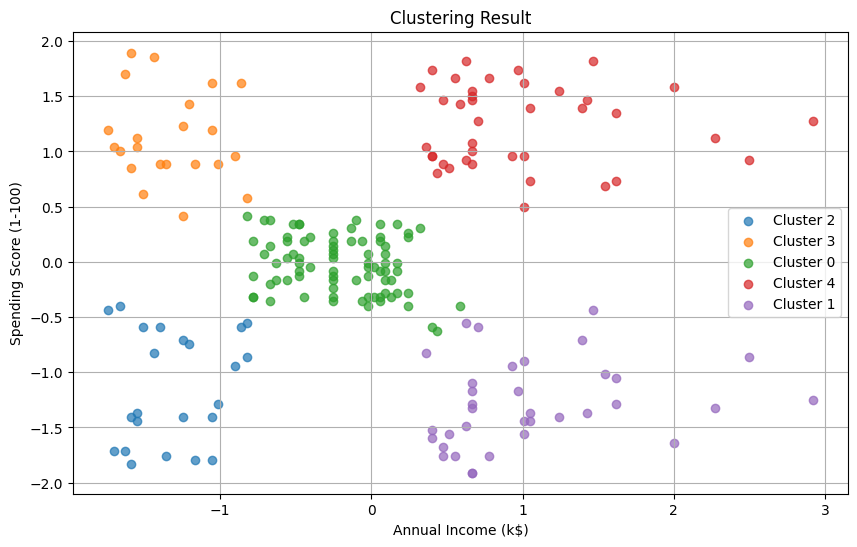

In [73]:
# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))

# Membuat scatter plot untuk setiap cluster
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}',
                alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.legend()
plt.grid(True)
plt.show()